# Randomly select splits to keep in the model

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)

num_kept_neurons = 2
lr=0.005
runs=50

#0: loss: 0.02861751988530159 - size: 209
#1: loss: 0.05586168169975281 - size: 209
#2: loss: 0.03742166608572006 - size: 209
#3: loss: 0.02906894125044346 - size: 209
#4: loss: 0.05075051262974739 - size: 209
#5: loss: 0.027230767533183098 - size: 209
#6: loss: 0.038755420595407486 - size: 209
#7: loss: 0.054917510598897934 - size: 209
#8: loss: 0.04817737638950348 - size: 209
#9: loss: 0.03250553458929062 - size: 209
#10: loss: 0.08541567623615265 - size: 209
#11: loss: 0.03204282373189926 - size: 209
#12: loss: 0.031169261783361435 - size: 209
#13: loss: 0.029501039534807205 - size: 209
#14: loss: 0.05740240961313248 - size: 209
#15: loss: 0.05660047382116318 - size: 209
#16: loss: 0.033028777688741684 - size: 209
#17: loss: 0.0775616392493248 - size: 209
#18: loss: 0.07858212292194366 - size: 209
#19: loss: 0.03175912797451019 - size: 209
#20: loss: 0.06017514690756798 - size: 209
#21: loss: 0.043125949800014496 - size: 209
#22: loss: 0.03096950054168701 - size: 209
#23: loss: 0.23

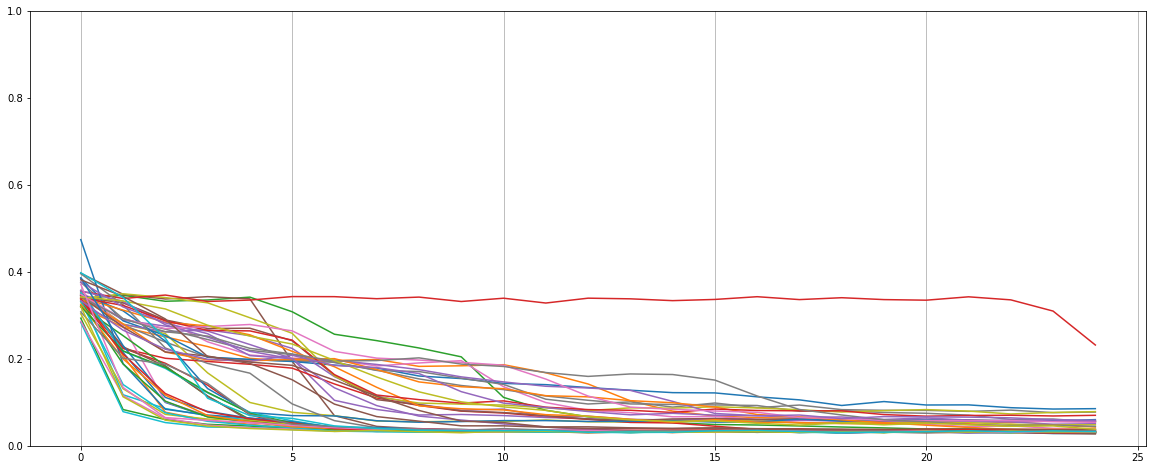

In [3]:
def grow(model):
    new_neurons = model.grow(num_novel=4)

    selected = [torch.randperm(n)[:num_kept_neurons] for n in new_neurons]

    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

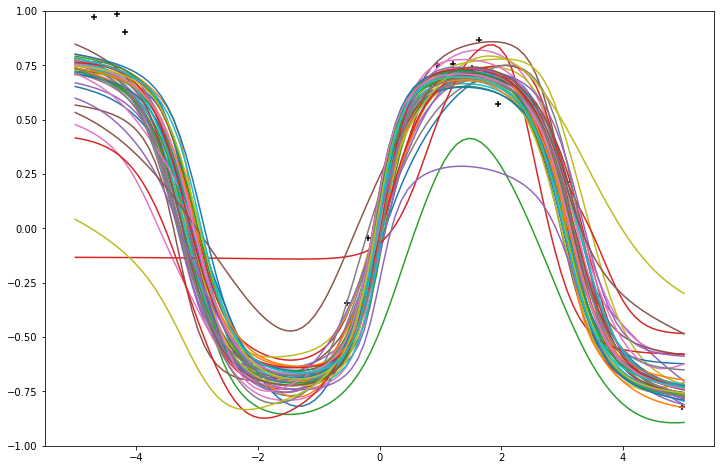

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'random_growth.pt')